<b><h3>Imports Required </b>

In [1]:
from googleapiclient.discovery import build
import pandas as pd
import numpy as np
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt

In [2]:
load_dotenv()
API_key = os.getenv("API_KEY")
service = build('youtube','v3',developerKey=API_key)
request = service.channels().list(
    part = 'Statistics',
    forUsername = 'schafer5'
)
response = request.execute()
print(response)

{'kind': 'youtube#channelListResponse', 'etag': 'j_cTaHXWbKrBrLFf0ntcJvgsuzI', 'pageInfo': {'totalResults': 1, 'resultsPerPage': 5}, 'items': [{'kind': 'youtube#channel', 'etag': '-bduqrftHTkw6JFsCtifK_iWuCc', 'id': 'UCCezIgC97PvUuR4_gbFUs5g', 'statistics': {'viewCount': '83330630', 'subscriberCount': '1070000', 'hiddenSubscriberCount': False, 'videoCount': '231'}}]}


<b><h3>Adding Comments from youtube </b>

In [14]:
vid=input("enter the video id :")
request = service.commentThreads().list(
    part = 'snippet,replies',
    videoId=vid
)
response = request.execute()

In [15]:
comments=[]
d={}
for i in response['items']:
    comments.append(i['snippet']['topLevelComment']['snippet'])
data = pd.DataFrame.from_dict(comments)


<h3><b>Preprocess</b></h3>

In [16]:
import nltk
from nltk.corpus import stopwords
from textblob import Word,TextBlob

In [17]:
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\leord\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\leord\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [18]:
def preprocessed_comments (comment):
    preprocessed_comment = comment
    preprocessed_comment.replace('[^\w\s]','')
    preprocessed_comment= " ".join(word for word in preprocessed_comment.split() if word not in stop_words)
    preprocessed_comment = " ".join(Word(word) for word in preprocessed_comment.split())
    
    return (preprocessed_comment)

In [19]:
data['preprocessed_comments']=data['textDisplay'].apply(lambda x : preprocessed_comments(x))
data

,videoId,textDisplay,textOriginal,authorDisplayName,authorProfileImageUrl,authorChannelUrl,authorChannelId,canRate,viewerRating,likeCount,publishedAt,updatedAt,preprocessed_comments
0,OsdQExBRPqA,"This concept is something unique, but pretty c...","This concept is something unique, but pretty c...",Dream,https://yt3.ggpht.com/ytc/AL5GRJXRF1kvsJqTKBjc...,http://www.youtube.com/channel/UCTkXRDQl0luXxV...,{'value': 'UCTkXRDQl0luXxVQrRQvWS6w'},True,none,24965,2023-02-14T23:31:41Z,2023-02-14T23:31:41Z,"This concept something unique, pretty confusin..."
1,OsdQExBRPqA,We neded more opition of minecraft content,We neded more opition of minecraft content,Tadeusz Flis,https://yt3.ggpht.com/ytc/AL5GRJXQ1VUWVQQGCNjf...,http://www.youtube.com/channel/UCtA0xa14ldF3dX...,{'value': 'UCtA0xa14ldF3dXhslAAE1wQ'},True,none,0,2023-03-07T09:56:04Z,2023-03-07T09:56:04Z,We neded opition minecraft content
2,OsdQExBRPqA,NICE👍Dream is berry good video I always see vi...,NICE👍Dream is berry good video I always see vi...,マリカ大将です‼️ 登録者数200人目標,https://yt3.ggpht.com/Rjyl7tw7kVl9sol6M0UMAt_B...,http://www.youtube.com/channel/UCRv43-6YmUd5eP...,{'value': 'UCRv43-6YmUd5eP5wVx3vnHQ'},True,none,1,2023-03-07T09:22:09Z,2023-03-07T09:22:09Z,NICE👍Dream berry good video I always see videos
3,OsdQExBRPqA,I have brain damage from what screen looking at-,I have brain damage from what screen looking at-,Unholy,https://yt3.ggpht.com/Y3j255QlOjpjfR5Ru-5l0hCP...,http://www.youtube.com/channel/UC-w56Huj_bjR1h...,{'value': 'UC-w56Huj_bjR1hQgIVo5--A'},True,none,0,2023-03-07T09:10:10Z,2023-03-07T09:10:10Z,I brain damage screen looking at-
4,OsdQExBRPqA,Dreem you are not ugly you are so beautiful,Dreem you are not ugly you are so beautiful,كيمو كوكا,https://yt3.ggpht.com/qmT-eXrDQ3w05Q7FWNIZyLug...,http://www.youtube.com/channel/UC8JMp_tFprOtRv...,{'value': 'UC8JMp_tFprOtRvR1g2EzSjw'},True,none,1,2023-03-07T06:56:58Z,2023-03-07T06:56:58Z,Dreem ugly beautiful
5,OsdQExBRPqA,@Dream on march 6th did you go in a Sam dao st...,@Dream on march 6th did you go in a Sam dao st...,Bean Fhdhdb,https://yt3.ggpht.com/ytc/AL5GRJX8Dgflf4EXsguh...,http://www.youtube.com/channel/UCO6y7dcwHcCFs1...,{'value': 'UCO6y7dcwHcCFs17C0ABI5oA'},True,none,0,2023-03-07T05:17:46Z,2023-03-07T05:17:46Z,@Dream march 6th go Sam dao stream
6,OsdQExBRPqA,Bang cara untuk mengalahkan Hanter meski 1000p...,Bang cara untuk mengalahkan Hanter meski 1000p...,Sri Astutik,https://yt3.ggpht.com/ytc/AL5GRJUia4qpLTVU_f2_...,http://www.youtube.com/channel/UCQ6RAUNhyAcq8f...,{'value': 'UCQ6RAUNhyAcq8fjgsIqN6hA'},True,none,1,2023-03-07T04:28:28Z,2023-03-07T04:28:28Z,Bang cara untuk mengalahkan Hanter meski 1000p...
7,OsdQExBRPqA,Dream fans are so cringe,Dream fans are so cringe,Lord Tabsian,https://yt3.ggpht.com/ytc/AL5GRJURyW-mOHOeTp6-...,http://www.youtube.com/channel/UCUp1PafZSbXV3o...,{'value': 'UCUp1PafZSbXV3ofq3k9MPXQ'},True,none,1,2023-03-07T04:24:14Z,2023-03-07T04:24:14Z,Dream fans cringe
8,OsdQExBRPqA,Dream ngecite,Dream ngecite,Putra Putra,https://yt3.ggpht.com/ytc/AL5GRJVZTACRcty5Ow-I...,http://www.youtube.com/channel/UCoOhRUOimaZ2YV...,{'value': 'UCoOhRUOimaZ2YVsV0sRJ0Mg'},True,none,0,2023-03-07T03:42:22Z,2023-03-07T03:42:22Z,Dream ngecite
9,OsdQExBRPqA,Hi,Hi,Peace and relaxation,https://yt3.ggpht.com/ytc/AL5GRJUR73RKp83RDXph...,http://www.youtube.com/channel/UCRS0EDLXe2pXUj...,{'value': 'UCRS0EDLXe2pXUjySlkfGmyQ'},True,none,0,2023-03-07T03:26:06Z,2023-03-07T03:26:06Z,Hi


<h3><b>Calculate Sentiment </b>

In [20]:
data['Polarity']=data['preprocessed_comments'].apply(lambda x : TextBlob(x).sentiment[0])
data['Subjectivity']=data['preprocessed_comments'].apply(lambda x : TextBlob(x).sentiment[1])

print("Mean Subjectivity :",np.mean(data['Subjectivity']))
print("Mean Polarity :",np.mean(data['Polarity']))

Mean Subjectivity : 0.3305113636363636
Mean Polarity : 0.13464646464646463


<h3><b>Visualize</b>


In [21]:
data['MA Polarity']=data.Polarity.rolling(10,min_periods=2).mean()
data['publish']=pd.to_datetime(data['publishedAt'])
data = data.sort_values(by = ['publish'],ascending=False)
data.head()

,videoId,textDisplay,textOriginal,authorDisplayName,authorProfileImageUrl,authorChannelUrl,authorChannelId,canRate,viewerRating,likeCount,publishedAt,updatedAt,preprocessed_comments,Polarity,Subjectivity,MA Polarity,publish
1,OsdQExBRPqA,We neded more opition of minecraft content,We neded more opition of minecraft content,Tadeusz Flis,https://yt3.ggpht.com/ytc/AL5GRJXQ1VUWVQQGCNjf...,http://www.youtube.com/channel/UCtA0xa14ldF3dX...,{'value': 'UCtA0xa14ldF3dXhslAAE1wQ'},True,none,0,2023-03-07T09:56:04Z,2023-03-07T09:56:04Z,We neded opition minecraft content,0.000,0.0,0.129798,2023-03-07 09:56:04+00:00
2,OsdQExBRPqA,NICE👍Dream is berry good video I always see vi...,NICE👍Dream is berry good video I always see vi...,マリカ大将です‼️ 登録者数200人目標,https://yt3.ggpht.com/Rjyl7tw7kVl9sol6M0UMAt_B...,http://www.youtube.com/channel/UCRv43-6YmUd5eP...,{'value': 'UCRv43-6YmUd5eP5wVx3vnHQ'},True,none,1,2023-03-07T09:22:09Z,2023-03-07T09:22:09Z,NICE👍Dream berry good video I always see videos,0.700,0.6,0.319865,2023-03-07 09:22:09+00:00
3,OsdQExBRPqA,I have brain damage from what screen looking at-,I have brain damage from what screen looking at-,Unholy,https://yt3.ggpht.com/Y3j255QlOjpjfR5Ru-5l0hCP...,http://www.youtube.com/channel/UC-w56Huj_bjR1h...,{'value': 'UC-w56Huj_bjR1hQgIVo5--A'},True,none,0,2023-03-07T09:10:10Z,2023-03-07T09:10:10Z,I brain damage screen looking at-,0.000,0.0,0.239899,2023-03-07 09:10:10+00:00
4,OsdQExBRPqA,Dreem you are not ugly you are so beautiful,Dreem you are not ugly you are so beautiful,كيمو كوكا,https://yt3.ggpht.com/qmT-eXrDQ3w05Q7FWNIZyLug...,http://www.youtube.com/channel/UC8JMp_tFprOtRv...,{'value': 'UC8JMp_tFprOtRvR1g2EzSjw'},True,none,1,2023-03-07T06:56:58Z,2023-03-07T06:56:58Z,Dreem ugly beautiful,0.075,1.0,0.206919,2023-03-07 06:56:58+00:00
5,OsdQExBRPqA,@Dream on march 6th did you go in a Sam dao st...,@Dream on march 6th did you go in a Sam dao st...,Bean Fhdhdb,https://yt3.ggpht.com/ytc/AL5GRJX8Dgflf4EXsguh...,http://www.youtube.com/channel/UCO6y7dcwHcCFs1...,{'value': 'UCO6y7dcwHcCFs17C0ABI5oA'},True,none,0,2023-03-07T05:17:46Z,2023-03-07T05:17:46Z,@Dream march 6th go Sam dao stream,0.000,0.0,0.172433,2023-03-07 05:17:46+00:00


In [22]:
sent = data[['publish','Polarity']]
sent = sent.sort_values(by='publish',ascending=True)
sent['MA polarity']=sent.Polarity.rolling(4,min_periods=2).mean()
sent

,publish,Polarity,MA polarity
0,2023-02-14 23:31:41+00:00,0.259596,NaN
19,2023-03-06 21:10:39+00:00,0.000000,0.129798
18,2023-03-06 21:58:39+00:00,0.370833,0.210143
17,2023-03-06 23:02:01+00:00,0.250000,0.220107
16,2023-03-06 23:05:05+00:00,0.000000,0.155208
15,2023-03-07 00:04:32+00:00,0.000000,0.155208
14,2023-03-07 00:41:09+00:00,0.000000,0.062500
13,2023-03-07 01:33:30+00:00,0.000000,0.000000
12,2023-03-07 01:38:44+00:00,0.600000,0.150000
11,2023-03-07 02:08:37+00:00,0.437500,0.259375


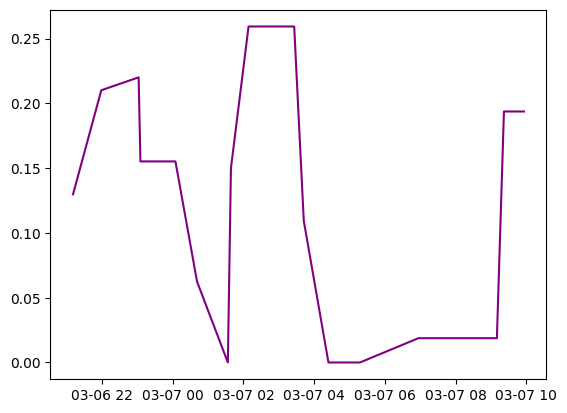

In [23]:

plt.plot(sent['publish'],sent['MA polarity'],color='purple')

plt.show()